<h1> Limpieza de datos</h1>
1. Problema del Negocio

Una entidad bancaria contrata una empresa de marketing encargada de contactar telefonicamente a posibles clientes para determinar si estan interesados o no en adquirir un certificado de depósito  a termino con el banco.

Que perfil tienen los clientes con mayor potencial de conversion?

<h2>Set de datos</h2>
<h3>Informacion recolectada por la empresa en un archivo CSV con 17 COLUMNAS, 16 de entrada y 1 de salida.</h3>

age: edad (numérica)

job: tipo de trabajo (categórica)

marital: estado civil

education: nivel educativo

default: si dejó de pagar sus obligaciones (categórica)

balance: saldo promedio anual en euros (numérica)

housing: ¿tiene o no crédito hipotecario? (categórica: )

loan: ¿tiene créditos de consumo? (categórica:)

contact: medio a través del cual fue contactado (categórica)

day: último día del mes en el que fue contactada (numérica)

month: último mes en el que fue contactada (categórica)

duration: duración (en segundos) del último contacto (numérica)

campaign: número total de veces que fue contactada durante la campaña (numérica)

pdays: número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)

previous: número de veces que ha sido contactada antes de esta campaña(numérica)

poutcome: resultado de la campaña de marketing anterior (categórica)

y: categoría ¿el cliente se suscribió a un depósito a término? (categórica)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ruta="/content/drive/MyDrive/exploratory data analysis (EDA)/Análisis Exploratorio de Datos - Entidad Bancaria/dataset_banco_clean.csv"
data=pd.read_csv(ruta)
data.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
5,5,35,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139.0,1,-1.0,0,unknown,no
6,6,28,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217.0,1,-1.0,0,unknown,no
7,7,42,entrepreneur,divorced,tertiary,yes,2.0,yes,no,unknown,5,may,380.0,1,-1.0,0,unknown,no
8,8,58,retired,married,primary,no,121.0,yes,no,unknown,5,may,50.0,1,-1.0,0,unknown,no
9,9,43,technician,single,secondary,no,593.0,yes,no,unknown,5,may,55.0,1,-1.0,0,unknown,no


Eliminamos la columna que se agrego como indice cuando lo guardamos.(Unnamed:0)

In [ ]:
data = data.drop(columns=['Unnamed: 0'])
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no
5,35,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139.0,1,-1.0,0,unknown,no
6,28,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217.0,1,-1.0,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2.0,yes,no,unknown,5,may,380.0,1,-1.0,0,unknown,no
8,58,retired,married,primary,no,121.0,yes,no,unknown,5,may,50.0,1,-1.0,0,unknown,no
9,43,technician,single,secondary,no,593.0,yes,no,unknown,5,may,55.0,1,-1.0,0,unknown,no


Visualizando nuestras variables.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


Tomamos las variables categoricas.

In [ ]:
cols_cat=data.select_dtypes(include='object').columns
cols_cat

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

GFraficos de barras

<ipython-input-6-49a6722f7a6a>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=35)
<ipython-input-6-49a6722f7a6a>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=35)
<ipython-input-6-49a6722f7a6a>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=35)
<ipython-input-6-49a6722f7a6a>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=35)
<ipython-input-6-49a6722f7a6a>:7: UserWarning: set_ticklabels() should only be used with a fixed number of t

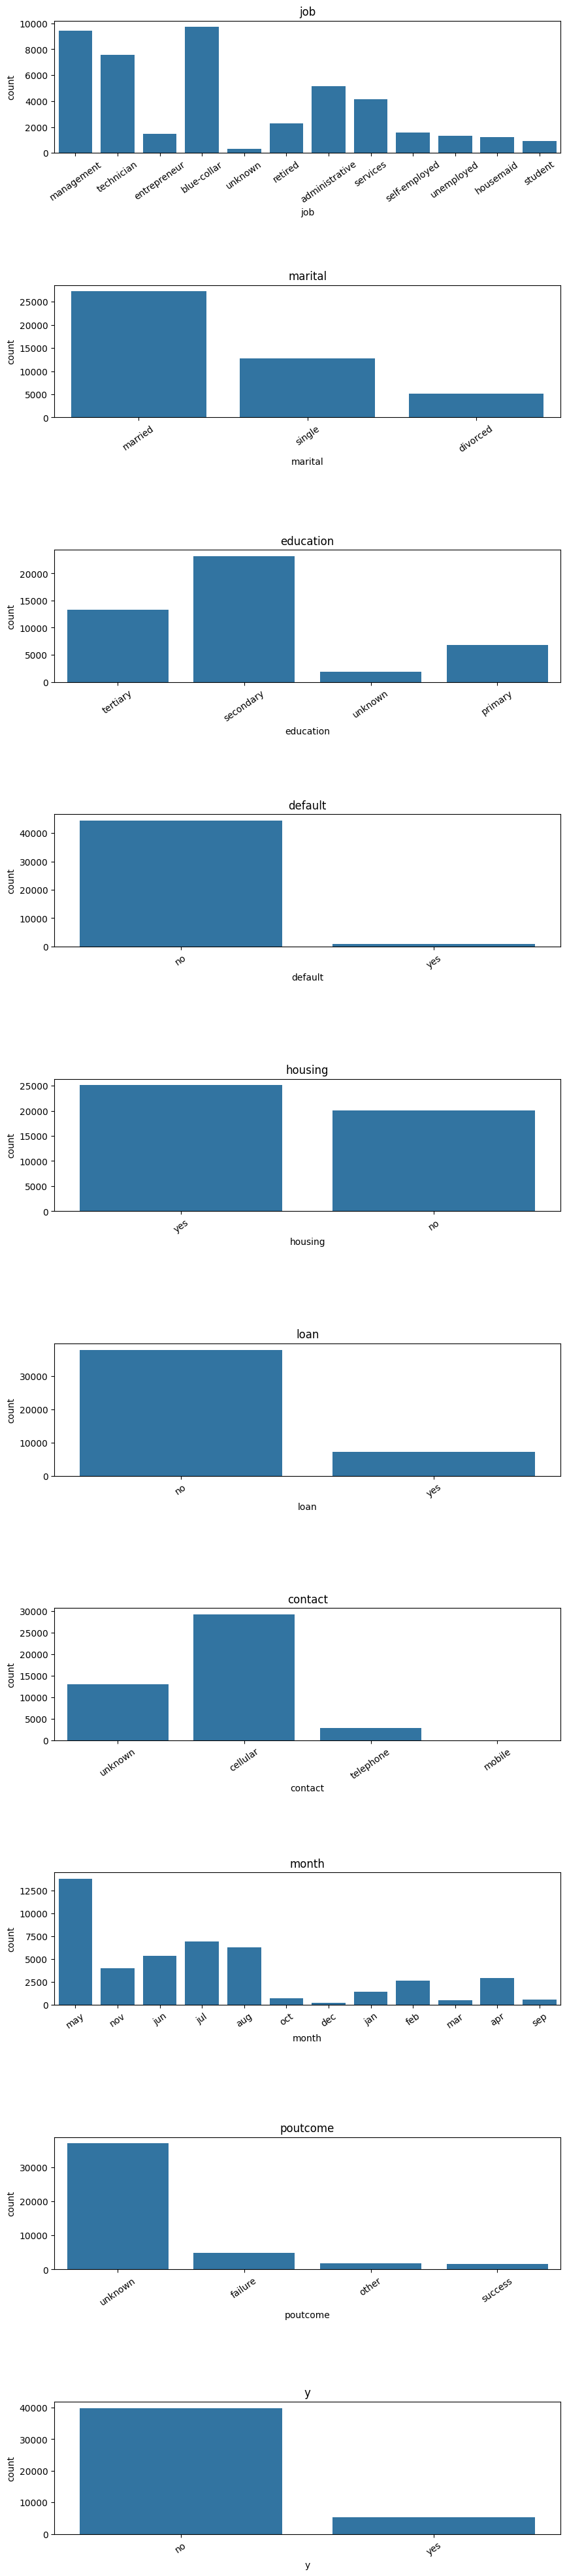

In [ ]:
fig,ax=plt.subplots(nrows=len(cols_cat),ncols=1,figsize=(10,50))
fig.subplots_adjust(hspace=1)

for i,col in enumerate(cols_cat):
  sns.countplot(x=col,data=data,ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=35)



Niveles de cada variable

In [ ]:
for col in cols_cat:
  print(f'{col}: {data[col].nunique()} subniveles')

job: 12 subniveles
marital: 3 subniveles
education: 4 subniveles
default: 2 subniveles
housing: 2 subniveles
loan: 2 subniveles
contact: 4 subniveles
month: 12 subniveles
poutcome: 4 subniveles
y: 2 subniveles


Eliminaremos las columnas que no aporten informacion relevante sobre el cliente

In [ ]:
data.drop(columns=['contact','month','day','duration','campaign','pdays','previous'],inplace=True)
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'poutcome', 'y'],
      dtype='object')

Revisaremos las variables numericas

In [ ]:
data.describe()

,age,balance
count,45189.000000,45189.000000
mean,40.936445,1374.012149
std,10.618502,3924.370039
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,527532.000000


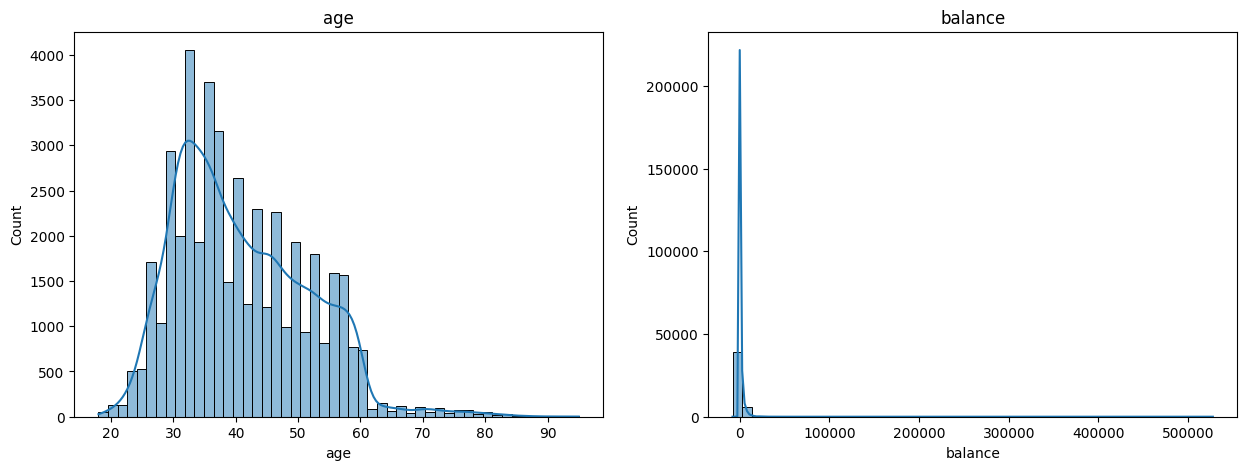

In [ ]:
cols_num=['age','balance']

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
fig.subplots_adjust(hspace=1)

for i,col in enumerate(cols_num):
  if col=='age':
    nbins=50
  else:
    nbins=50
  sns.histplot(x=col,data=data,ax=ax[i],bins=nbins,kde=True)
  ax[i].set_title(col)


In [ ]:
data['balance'].describe()

,balance
count,45189.000000
mean,1374.012149
std,3924.370039
min,-8019.000000
25%,72.000000
50%,448.000000
75%,1428.000000
max,527532.000000


#### Observamos que:
- La mayoria de personas con edad de entre 30 a 50 años, con una inclinacion entre los 30 a 40 años.
-La mayoria de personas (tercer cuartil o 75%) tiene saldos que no superan los 1428 euros.


In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'poutcome', 'y'],
      dtype='object')